In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()# load data

#visualise normalise reshape build neural network train ann test

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
y_train.shape

(60000,)

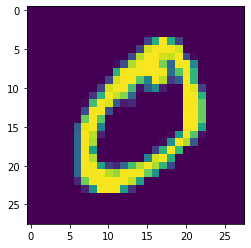

In [7]:
plt.imshow(x_train[1])

In [8]:
y_train[1]

0

 #normalised 

In [9]:
x_train=x_train/255#data sanity check
x_test=x_test/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

In [13]:
y_train.shape

(60000,)

In [14]:
x_train=x_train.reshape(60000,28*28)#reshaping x as itis 3d
x_test=x_test.reshape(10000,28*28)

In [15]:
y_train=keras.utils.to_categorical(y_train)#one hot encoding y 
y_test=keras.utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_test.shape

(10000, 784)

In [18]:
y_test.shape

(10000, 10)

In [19]:
y_train.shape

(60000, 10)

#no need to normalise y_train and test because it is already 2d

In [20]:
ann=Sequential()#create neural network
ann.add(Dense(units=512,activation='relu',input_dim=784))#hl
ann.add(Dense(units=64,activation='relu'))#hl
ann.add(Dense(units=32,activation='relu'))#hl
ann.add(Dense(units=10,activation='softmax'))#opl
ann.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
ann.fit(x_train,y_train,epochs=100)#train the model/model deployment

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2135 - accuracy: 0.9367
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9727
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9806
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9855
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9892
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9905
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 81/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 82/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 83/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 84/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9992
Epoch 85/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 86/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9991
Epoch 87/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9992
Epoch 88/100
1875/1875 [==============================] - 4s 2ms/step - loss:

In [22]:
train_score=ann.evaluate(x_train,y_train)#evaluate train score

1875/1875 [==============================] - 2s 965us/step - loss: 0.0123 - accuracy: 0.9982


In [23]:
test_score=ann.evaluate(x_test,y_test)#evaluate test score

313/313 [==============================] - 0s 959us/step - loss: 0.2590 - accuracy: 0.9800


In [24]:
np.argmax(ann.predict(x_test[0:100]).round(2),axis=1)#predict

4/4 [==============================] - 0s 0s/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 9,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)

In [25]:
np.argmax(y_test[0:100],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)